<a href="https://colab.research.google.com/github/goforswap/Leukemia-Classification/blob/main/Leukemia_Segmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Necessary Libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
data = []
label = []
Files = ['Benign', 'Early', 'Pre', 'Pro']
label_val = 0

for files in Files:
    cpath = os.path.join("/content/drive/MyDrive/Segmented", files)
    for img in os.listdir(cpath):
        image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_COLOR)
        data.append(image_array)
        label.append(label_val)
    label_val = label_val+1

In [ ]:
# Transforming to Numpy Array
X = np.asarray(data)
y = np.asarray(label)

In [ ]:
# Shuffling Dataset Values
X, y = shuffle(X, y)

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Printing the Shapes
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (2604, 224, 224, 3)
Shape of X_test is (652, 224, 224, 3)
Shape of y_train is (2604,)
Shape of y_test is (652,)


In [ ]:
# Normalizing Training Set
X_train=X_train/255
X_test=X_test/255

# Categorizing Testing Set
y_train_cat=to_categorical(y_train,4)
y_test_cat=to_categorical(y_test,4)

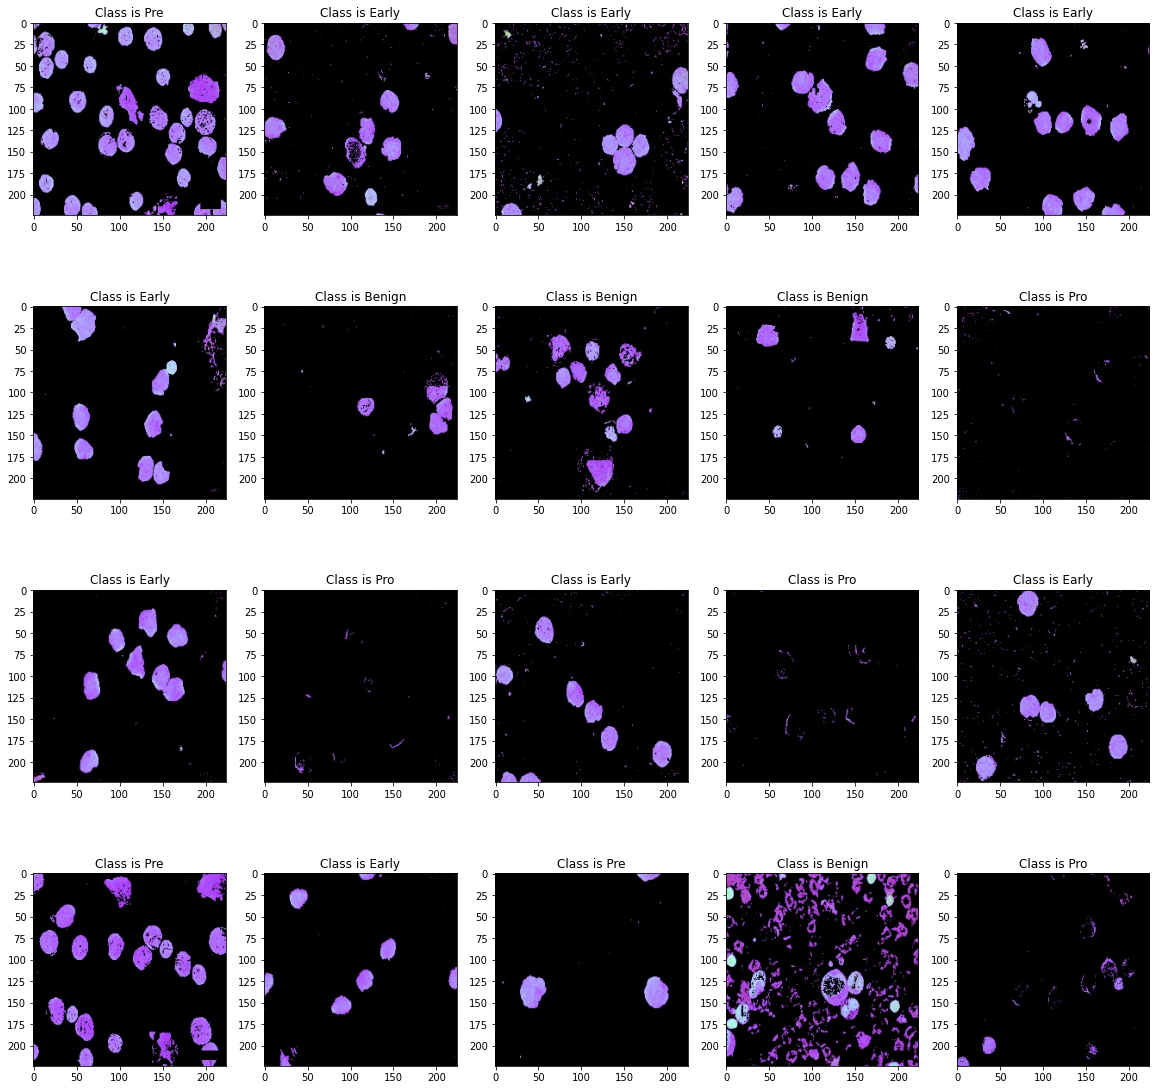

In [ ]:
# Visualizing the Data

X_train__ = X_train.reshape(X_train.shape[0], 224, 224, 3)

fig, axis = plt.subplots(4, 5, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train_cat[i].argmax()
    classname = Files[digit]
    ax.set(title = "Class is {:}".format(classname))

In [ ]:
# Building CNN Model
CNN_model = Sequential()

CNN_model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(224,224,3)))
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

CNN_model.add(Flatten())
CNN_model.add(Dense(16))
CNN_model.add(Dense(4, activation='softmax'))

CNN_model.summary()

# Compiling CNN model
CNN_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 16)                2

In [ ]:
# Training CNN Model
CNN_history=CNN_model.fit(X_train,
                  y_train_cat,
                  epochs=25,
                  batch_size=16,
                  validation_data=(X_test,y_test_cat))

Epoch 1/25
163/163 [==============================] - 311s 2s/step - loss: 0.4914 - accuracy: 0.8122 - val_loss: 0.5521 - val_accuracy: 0.7745
Epoch 2/25
163/163 [==============================] - 305s 2s/step - loss: 0.1477 - accuracy: 0.9528 - val_loss: 0.7683 - val_accuracy: 0.8098
Epoch 3/25
163/163 [==============================] - 306s 2s/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.9543 - val_accuracy: 0.8098
Epoch 4/25
163/163 [==============================] - 305s 2s/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.9152 - val_accuracy: 0.8052
Epoch 5/25
163/163 [==============================] - 305s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.9466 - val_accuracy: 0.8298
Epoch 6/25
163/163 [==============================] - 304s 2s/step - loss: 4.5525e-04 - accuracy: 1.0000 - val_loss: 0.9758 - val_accuracy: 0.8267
Epoch 7/25
163/163 [==============================] - 304s 2s/step - loss: 2.7653e-04 - accuracy: 1.0000 - val_loss: 1.0193 - val_accuracy

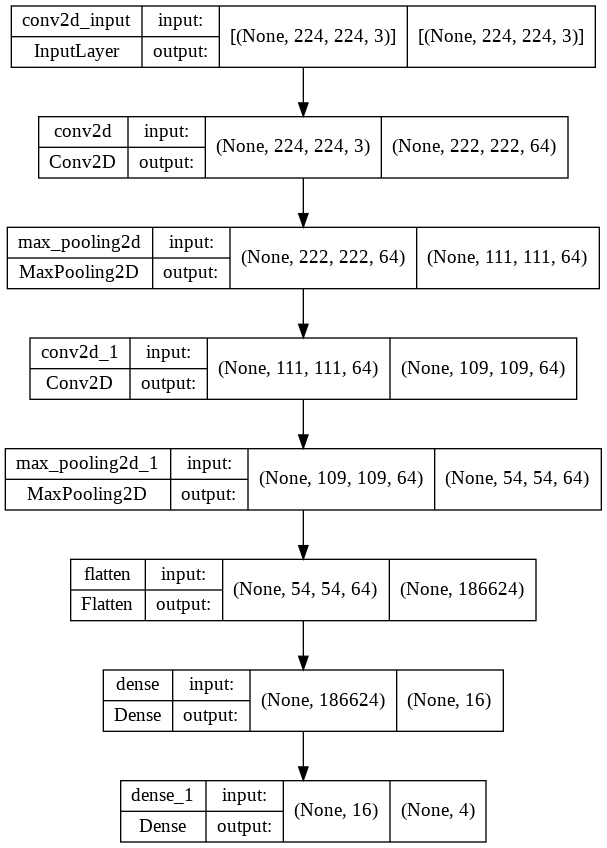

In [ ]:
# Plotting CNN Model
plot_model(CNN_model, show_shapes=True, show_layer_names=True)

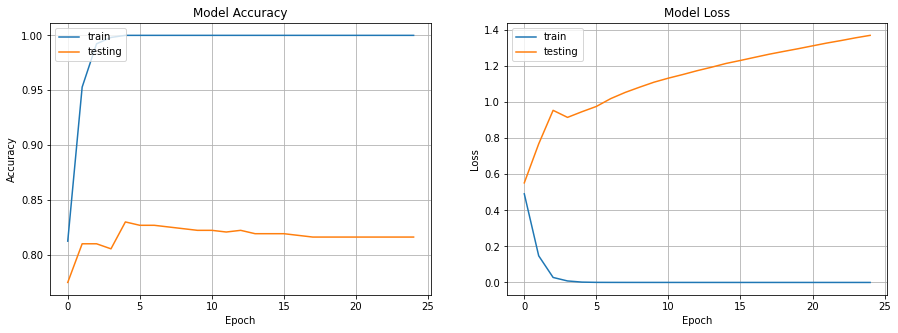

In [ ]:
# Visualizing Fitting History

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    
    axs[0].plot(CNN_history.history['accuracy']) 
    axs[0].plot(CNN_history.history['val_accuracy']) 
    axs[0].grid()
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'testing'], loc='upper left')
    
    axs[1].plot(CNN_history.history['loss']) 
    axs[1].plot(CNN_history.history['val_loss']) 
    axs[1].grid()
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'testing'], loc='upper left')
    plt.show()

plotmodelhistory(CNN_history)

In [ ]:
# Evaluating CNN Model
scores = CNN_model.evaluate(X_test, y_test_cat, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

21/21 [==============================] - 20s 884ms/step - loss: 1.3700 - accuracy: 0.8160
Test loss: 1.3700226545333862
Test accuracy: 0.8159509301185608


In [ ]:
# Functions for Confusion Matrix

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > threshold else "black")
            texts.append(text)

    return texts

In [ ]:
# Predicting Test Set Values
pred = CNN_model.predict(X_test)
CNN_pred = np.argmax(pred,axis=1)
CNN_true = np.argmax(y_test_cat, axis=1)

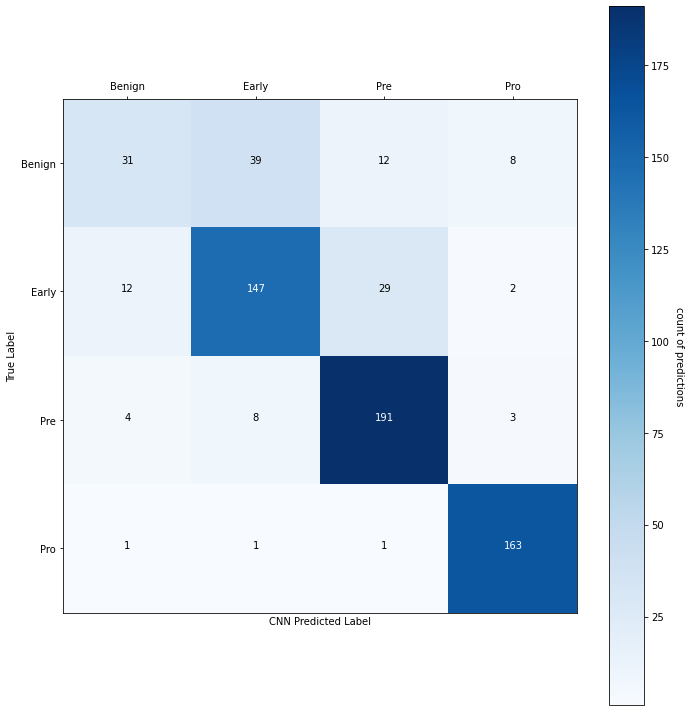

In [ ]:
# Creating Confusion Matrix
cm = confusion_matrix(CNN_true, CNN_pred) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmap(cm, Files, Files, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
# Classification Report
print(classification_report(CNN_true, CNN_pred))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45        90
           1       0.75      0.77      0.76       190
           2       0.82      0.93      0.87       206
           3       0.93      0.98      0.95       166

    accuracy                           0.82       652
   macro avg       0.79      0.76      0.76       652
weighted avg       0.80      0.82      0.80       652



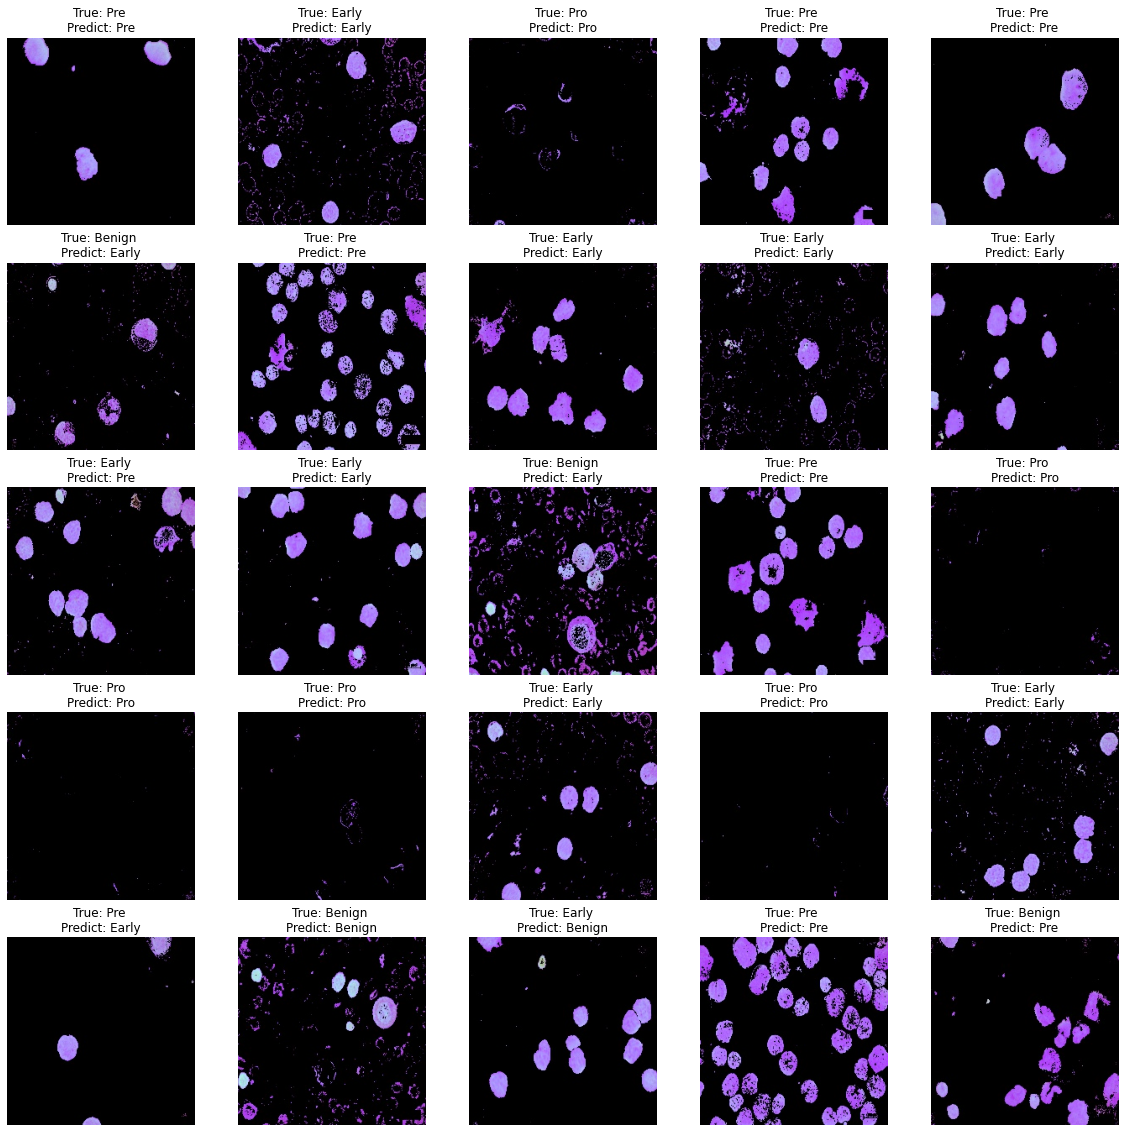

In [ ]:
# Checking the Predictions computed from the Model

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 5*5):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (Files[CNN_true[i]], Files[CNN_pred[i]]))
    axes[i].axis('off')

In [ ]:
# Importing Traditional ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Reshaping Training and Testing Set
# For Traditional ML Algorithms
nsamples, nx, ny, nrgb = X_train.shape
X_train_ML = X_train.reshape((nsamples, nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_test.shape
X_test_ML = X_test.reshape((nsamples, nx*ny*nrgb))

In [ ]:
# Function for Training, Predicting & Evaluation ML Model
def model_eval(model, X_train_ML, y_train, X_test_ML, y_test):
  model.fit(X_train_ML,y_train)  
  y_pred = model.predict(X_test_ML)
  print("\nAccuracy Score: {:.4f} ~ {:.2f}%".format(accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)*100))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  # Creating Confusion Matrix
  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_test, y_pred) 
  thresh = cm.max() / 2.

  fig, ax = plt.subplots(figsize=(10,10))
  im, cbar = heatmap(cm, Files, Files, ax=ax,
                    cmap=plt.cm.Blues, cbarlabel="count of predictions")
  texts = annotate_heatmap(im, data=cm, threshold=thresh)

  fig.tight_layout()
  plt.show()

Using "Logistic Regression" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.6518 ~ 65.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30        95
           1       0.54      0.60      0.57       182
           2       0.64      0.61      0.62       202
           3       0.87      0.97      0.92       173

    accuracy                           0.65       652
   macro avg       0.61      0.61      0.60       652
weighted avg       0.64      0.65      0.64       652


Confusion Matrix:


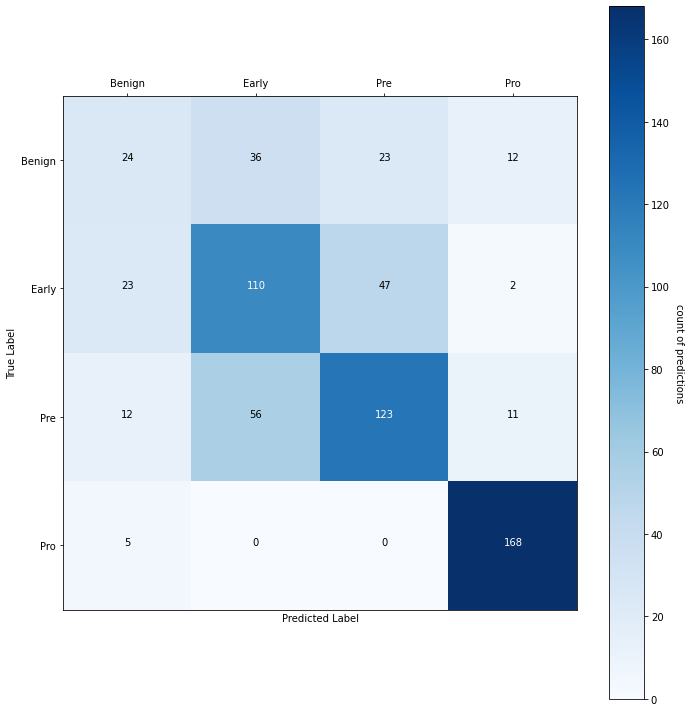

In [ ]:
# Implementing Logistic Regression
model = LogisticRegression(max_iter=1000)
print("Using \"Logistic Regression\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Decision Tree" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.5414 ~ 54.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        99
           1       0.53      0.53      0.53       205
           2       0.56      0.60      0.58       187
           3       0.72      0.70      0.71       161

    accuracy                           0.54       652
   macro avg       0.51      0.51      0.51       652
weighted avg       0.54      0.54      0.54       652


Confusion Matrix:


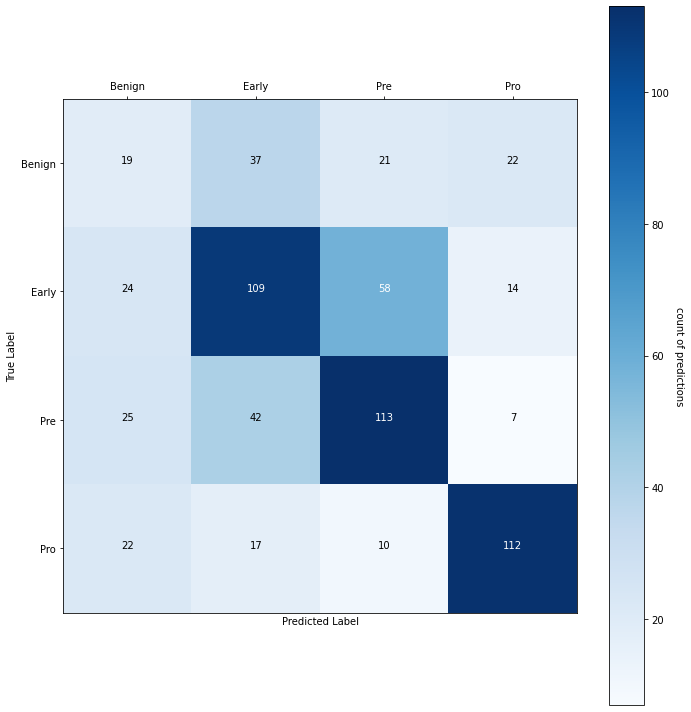

In [ ]:
# Implementing Decision Tree
model = DecisionTreeClassifier(max_depth=30)
print("Using \"Decision Tree\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Random Forest" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.7761 ~ 77.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.16      0.25       107
           1       0.73      0.85      0.78       195
           2       0.80      0.87      0.83       191
           3       0.84      0.99      0.91       159

    accuracy                           0.78       652
   macro avg       0.74      0.72      0.69       652
weighted avg       0.75      0.78      0.74       652


Confusion Matrix:


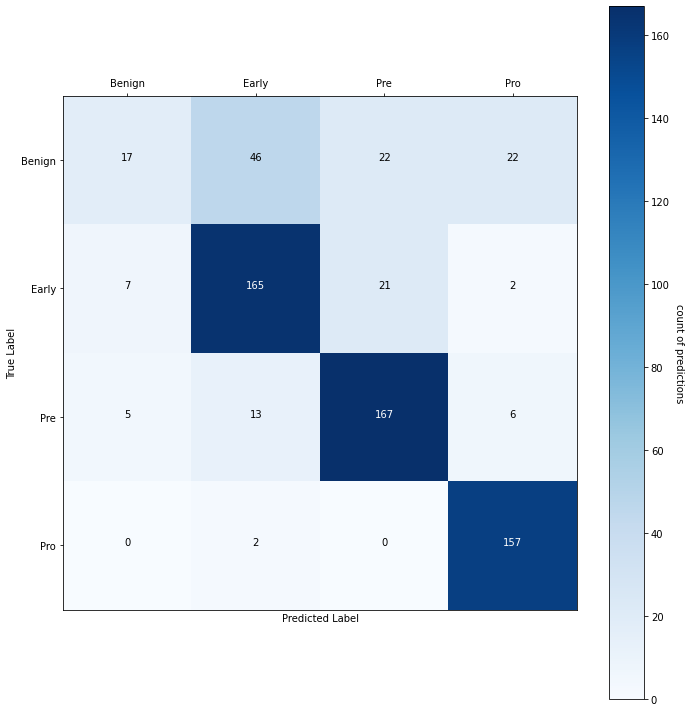

In [ ]:
# Implementing Random Forest
model=RandomForestClassifier(n_estimators=300)
print("Using \"Random Forest\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "K-Neighbors" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.3359 ~ 33.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.02      0.03        99
           1       0.05      0.01      0.02       205
           2       0.47      0.29      0.36       187
           3       0.35      1.00      0.51       161

    accuracy                           0.34       652
   macro avg       0.23      0.33      0.23       652
weighted avg       0.25      0.34      0.24       652


Confusion Matrix:


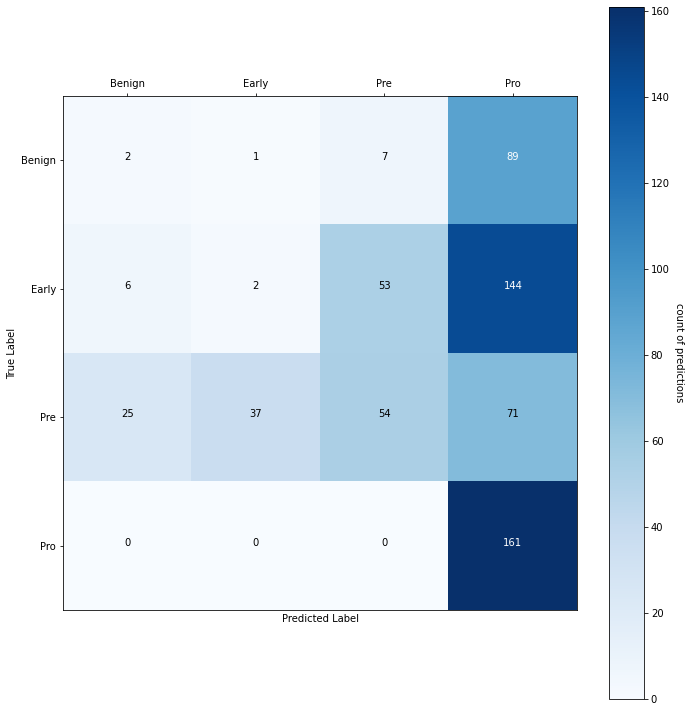

In [ ]:
# Implementing K-Neighbors
model = KNeighborsClassifier()
print("Using \"K-Neighbors\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "SVM" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.6380 ~ 63.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        99
           1       0.57      0.53      0.55       205
           2       0.57      0.62      0.59       187
           3       0.96      0.99      0.97       161

    accuracy                           0.64       652
   macro avg       0.61      0.62      0.61       652
weighted avg       0.63      0.64      0.63       652


Confusion Matrix:


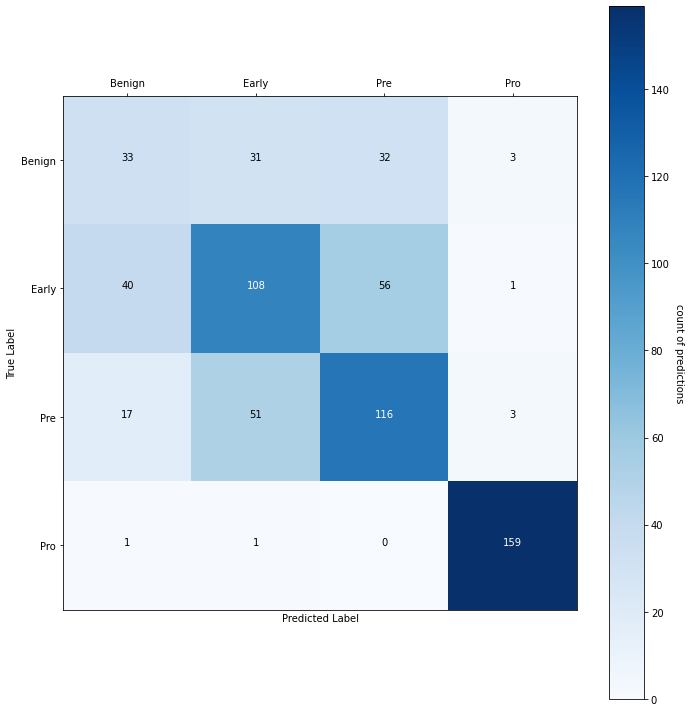

In [ ]:
# Implementing SVM
model = SVC(kernel='linear', C = 1.0)
print("Using \"SVM\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Naive Bayes (Gaussian)" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.6702 ~ 67.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.57      0.39        99
           1       0.75      0.54      0.63       205
           2       0.79      0.88      0.83       187
           3       1.00      0.66      0.80       161

    accuracy                           0.67       652
   macro avg       0.71      0.66      0.66       652
weighted avg       0.75      0.67      0.69       652


Confusion Matrix:


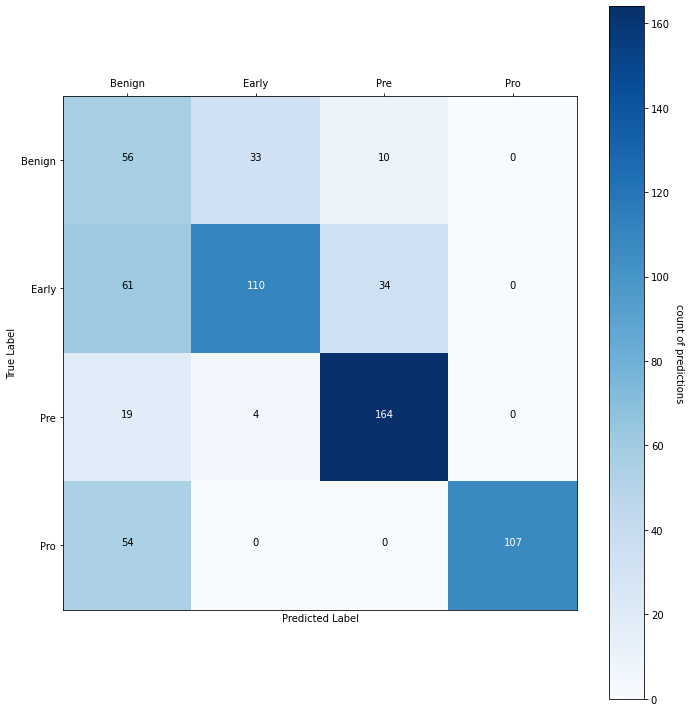

In [ ]:
# Implementing Naive Bayes (Gaussian)
model = GaussianNB()
print("Using \"Naive Bayes (Gaussian)\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

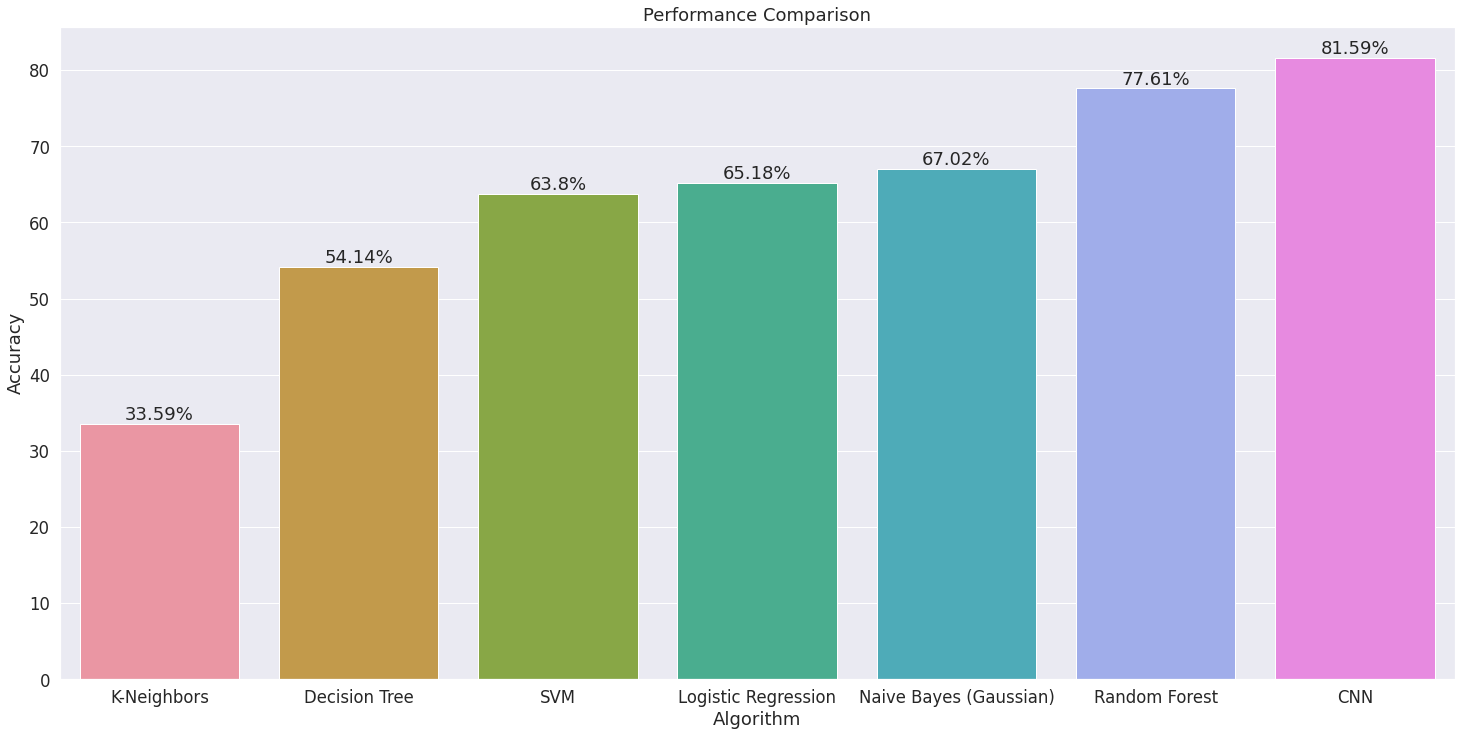

In [ ]:
# Plotting Accuracy of All Models
models = ['K-Neighbors', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes (Gaussian)', 'Random Forest', 'CNN']
accuracy = [33.59, 54.14, 63.80, 65.18, 67.02, 77.61, 81.59]

sns.set(font_scale = 1.5, palette="husl")
plt.figure(figsize=(25,12))
sns.barplot(x=models, y=accuracy)
for i in range(len(models)):
    value = str(accuracy[i]) + "%"
    plt.text(i, accuracy[i], value, ha="center", va="bottom")
plt.title('Performance Comparison')
plt.ylabel('Accuracy') 
plt.xlabel('Algorithm')

plt.show()